# How to Go From Default to Amazing Looking Plots in 3 Easy Steps

Code for the following Medium article: [link](https://medium.com/gitconnected/how-to-go-from-default-to-amazing-looking-plots-in-3-easy-steps-a618b00d0db1)

The changes that make the difference:  
* remove spines
* update colours
* update fontface and size

## Imports

In [1]:
from cycler import cycler
from datetime import date, timedelta

import matplotlib.pyplot as plt
from matplotlib import font_manager, rcdefaults

import numpy as np

## Display `matplotlib's` default colours

In [2]:
default_colours = plt.rcParams['axes.prop_cycle']
default_colours

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


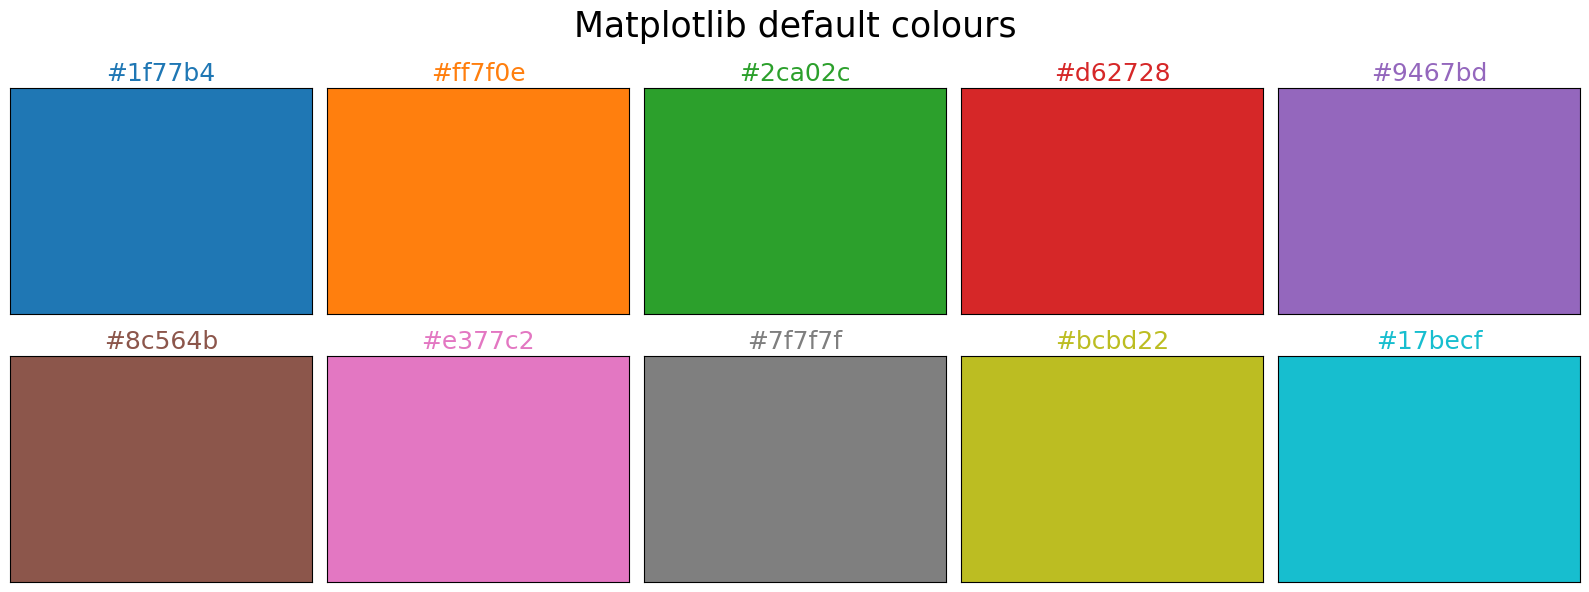

In [3]:
fig, axs = plt.subplots(
    2, int(len(default_colours) / 2), 
    figsize=(16, 6),
    layout="tight"
)
fig.suptitle(
    "Matplotlib default colours",
    fontsize=25
)

for ax, colour in zip(axs.flat, default_colours):
    ax.set_facecolor(colour["color"])
    ax.set_title(
        colour["color"],
        color=colour["color"],
        fontsize=18
    )
    ax.tick_params(
        bottom=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )


plt.tight_layout()

## Default look

We're going to use bar chart to demo all the changes.

As we've seen above, there are 10 default colours in the `matplotlib` cycler.

Therefore, we're going to use a bar chart with 10 data points in this demo.

### Mock data

In [4]:
np.random.seed(1111)

# Bar chart data - 10 points
mock_data = {
    key: val 
    for key, val in 
    zip(
        list("ABCDEFGHIJ"),
        np.random.randint(1, 10, 10)
    )
}

mock_data

{'A': 8,
 'B': 6,
 'C': 2,
 'D': 3,
 'E': 5,
 'F': 9,
 'G': 7,
 'H': 5,
 'I': 9,
 'J': 7}

### The default plot

Text(0, 0.5, 'Height')

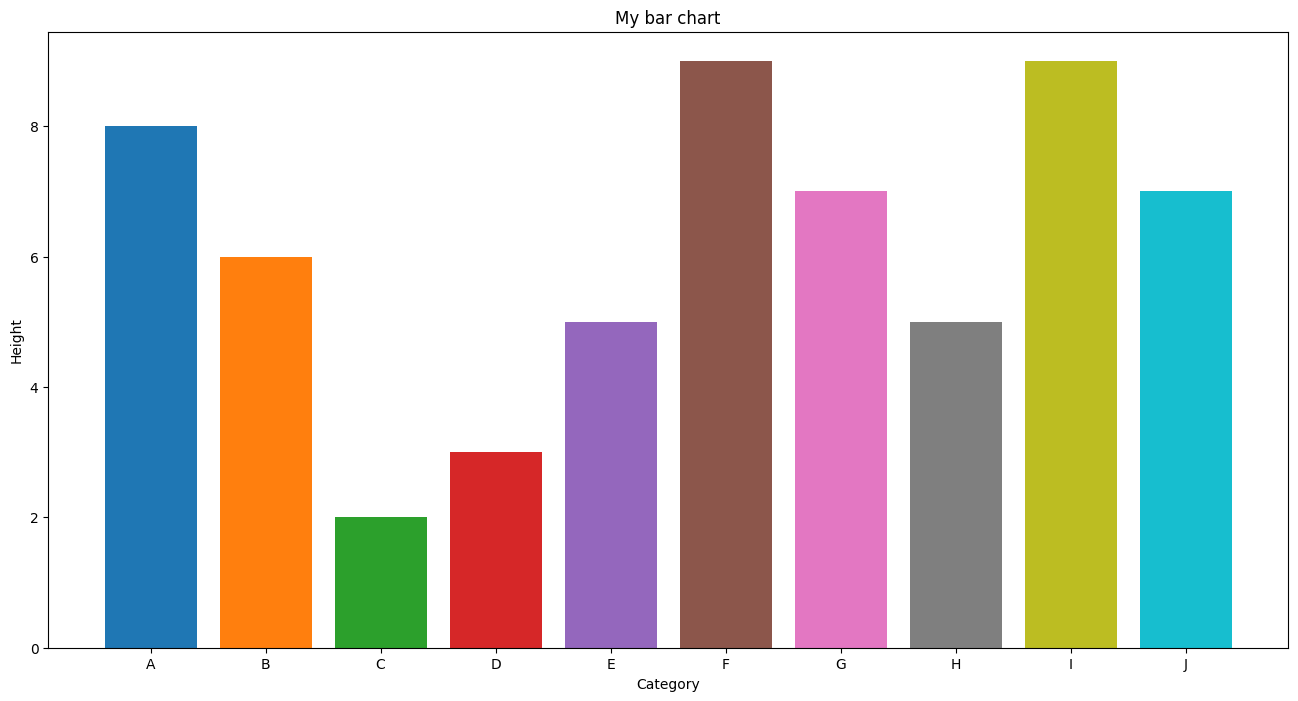

In [5]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

ax.set_title("My bar chart")
ax.set_xlabel("Category")
ax.set_ylabel("Height")


## Tip 1: remove spines

In most cases, top and right spine cause unnecessary clatter. Therefore, we can hide them.

### Changing the setting of the `ax`

Text(0, 0.5, 'Height')

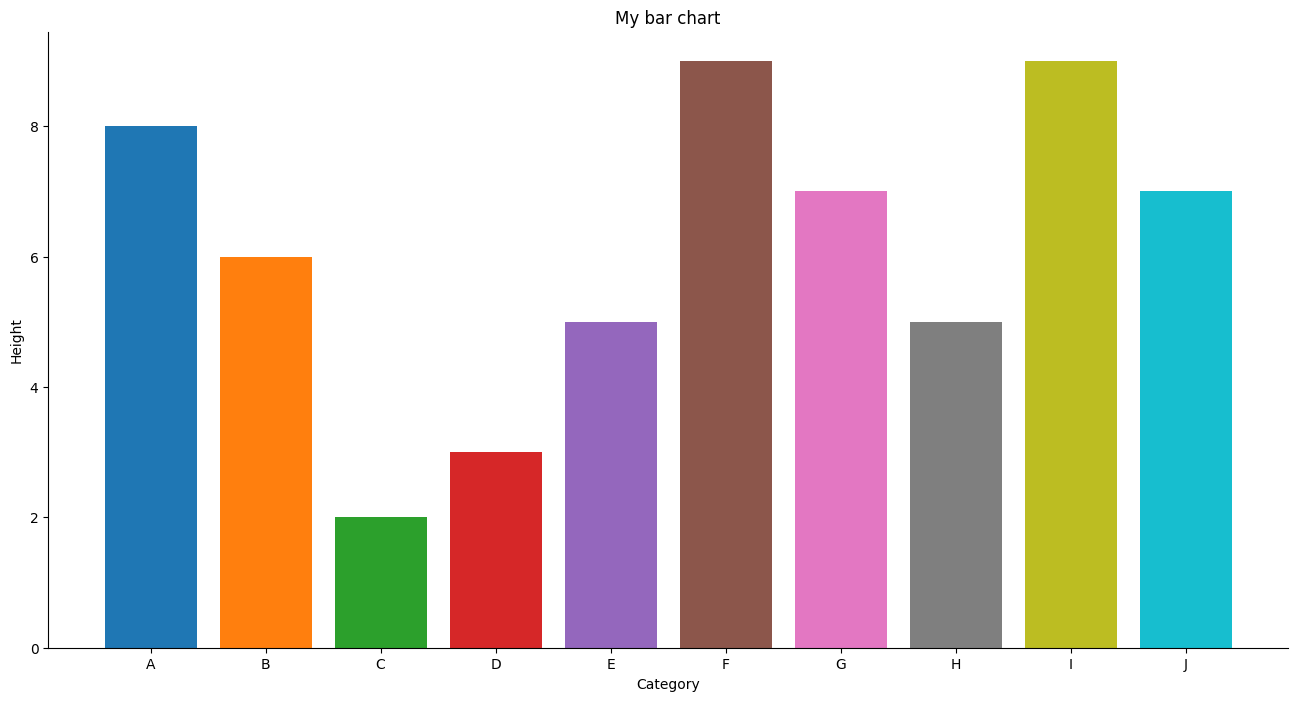

In [6]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

# Hide unnecessary spines
ax.spines[["top", "right"]].set_visible(False)

ax.set_title("My bar chart")
ax.set_xlabel("Category")
ax.set_ylabel("Height")


### Update the `rcParams`

If we want the change to be more permanent and apply to all the graphs, we can hide the spines using the `rcParams`.

In [7]:
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

Text(0, 0.5, 'Height')

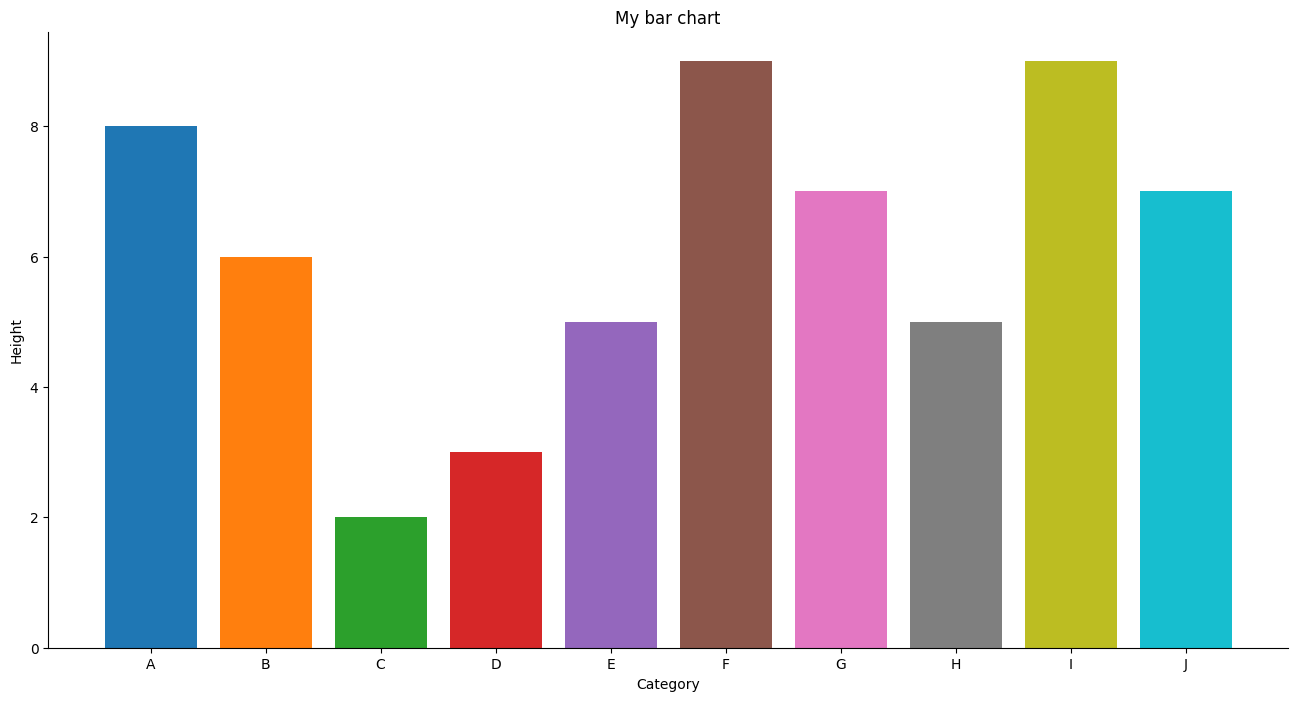

In [8]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

ax.set_title("My bar chart")
ax.set_xlabel("Category")
ax.set_ylabel("Height")

## Tip 2: update colours in `rcParams`

I think the default colours are fine. But we can do better.

You don't have to create your own new colour palette from scratch as there are plenty of good ones available online.  

The one I like a lot is the GNOME palette:

https://developer.gnome.org/hig/reference/palette.html

It's got 5 levels of every colour.

In [9]:
# Update colours in the cycler
plt.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "#3584e4",  # blue
        "#33d17a",  # green
        "#f6d32d",  # yellow
        "#ff7800",  # orange
        "#e01b24",  # red
        "#9141ac",  # purple
        "#986a44",  # brown
        "#deddda",  # light
        "#3d3846",  # dark
    ]
)

Text(0, 0.5, 'Height')

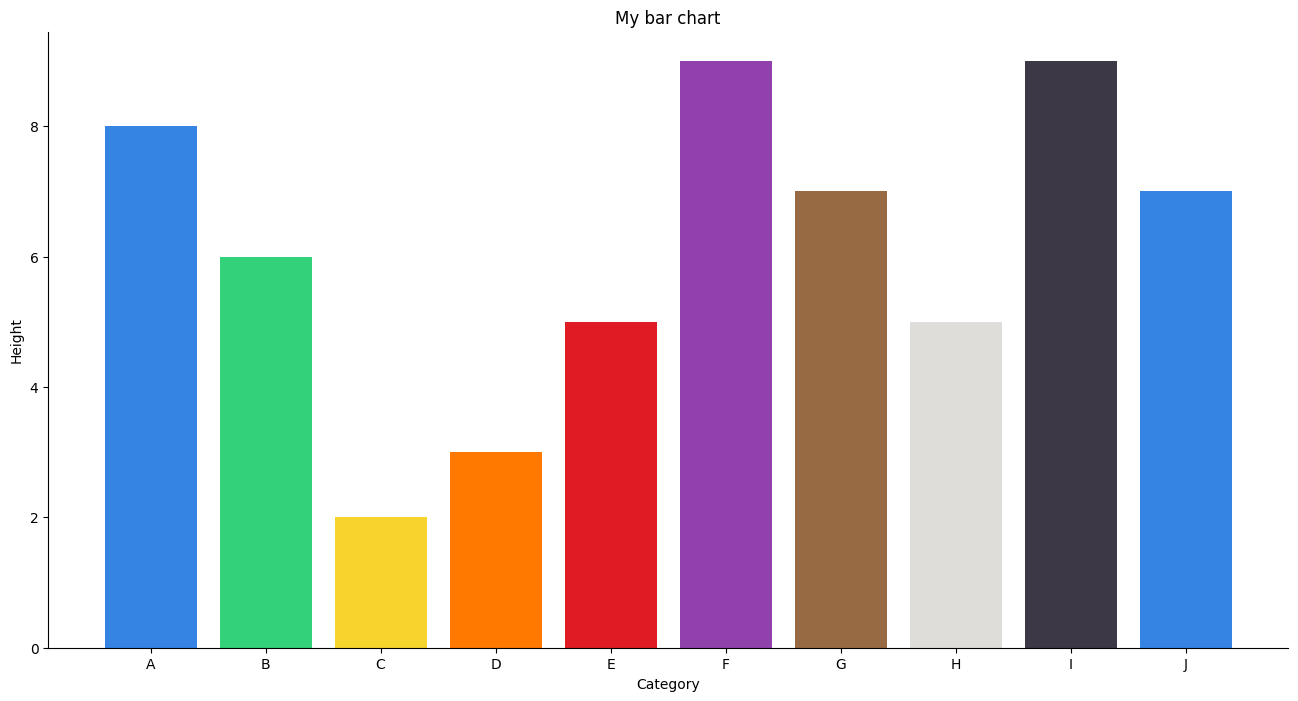

In [10]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

ax.set_title("My bar chart")
ax.set_xlabel("Category")
ax.set_ylabel("Height")

## Tip 3: update font settings

### Make all system fonts available to matplotlib

In [11]:
for font in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    try:
        font_manager.fontManager.addfont(font)
    except:
        print(f"Problem with the: {font}")

### Check available font names

In [12]:
# sorted(font_manager.get_font_names())

### Plot with a new font - change locally

We're going to use data from a previous example.

Text(0, 0.5, 'Height')

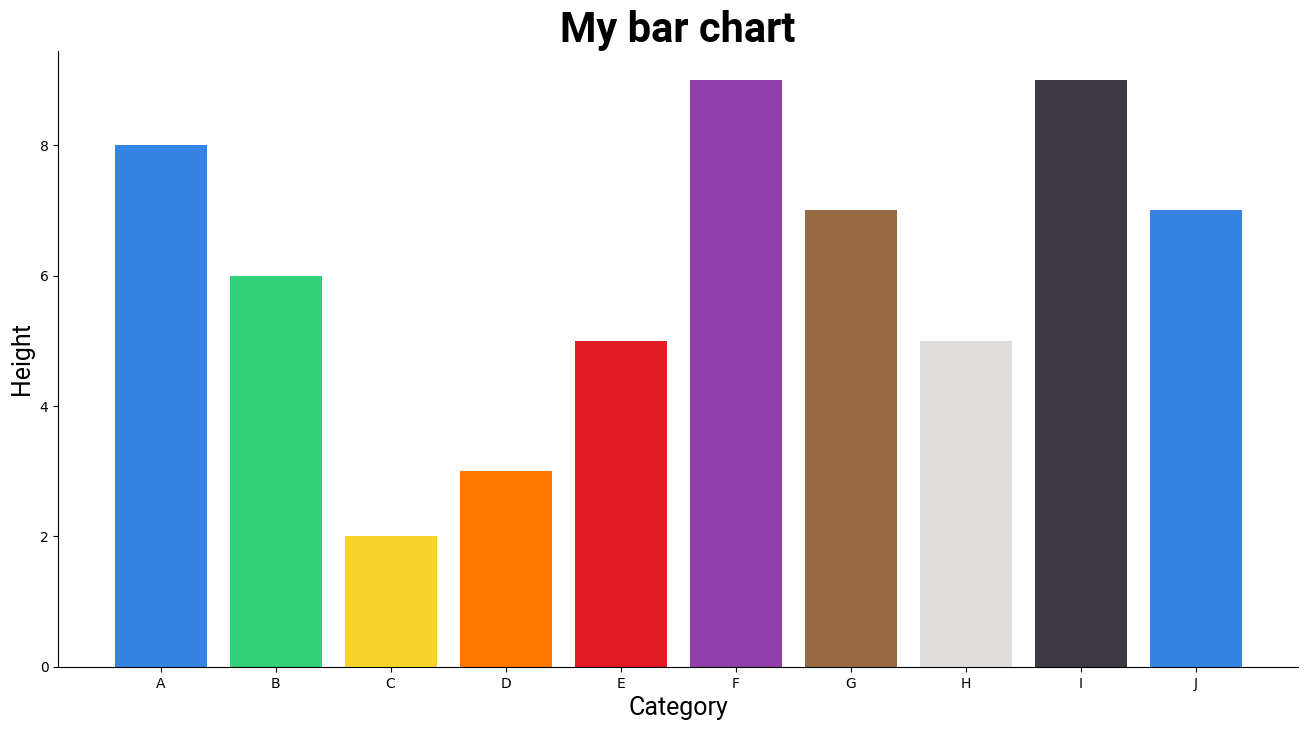

In [13]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

ax.set_title(
    "My bar chart",
    fontsize=30,
    fontname="Roboto",
    weight="bold"
)
ax.set_xlabel(
    "Category",
    fontsize=18,
    fontname="Roboto"
)
ax.set_ylabel(
    "Height",
    fontsize=18,
    fontname="Roboto"
)

### Plot with a new font - update `rcParams`

In [14]:
plt.rcParams["font.family"]  = "Roboto"
plt.rcParams["font.size"]  = 18
plt.rcParams["axes.titlesize"]  = 30
plt.rcParams["axes.titleweight"]  = "bold"

Text(0, 0.5, 'Height')

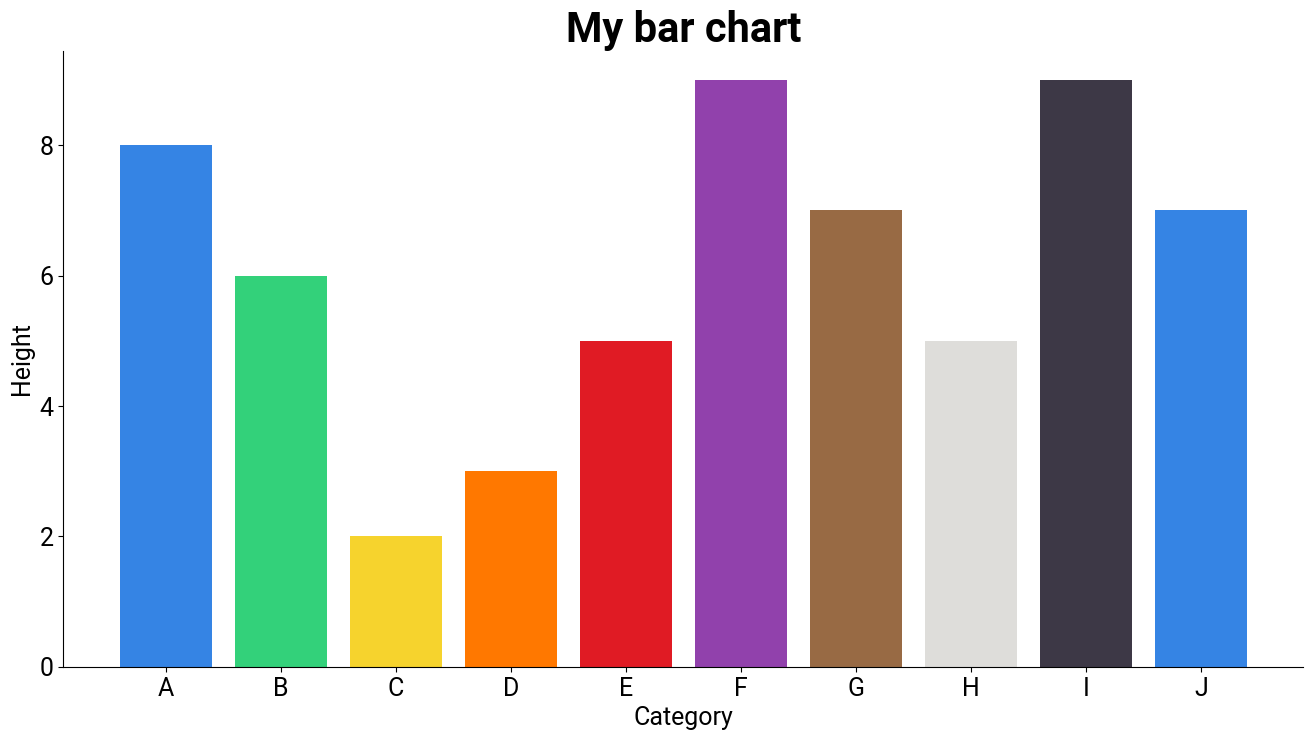

In [15]:
fig, ax = plt.subplots(
    figsize=(16, 8)
)
for key, val in mock_data.items():
    ax.bar(
        x=key,
        height=val
    )

ax.set_title("My bar chart")
ax.set_xlabel("Category")
ax.set_ylabel("Height")

## Showcase - subplot function

In [16]:
def my_plot(nr_of_colors: int=10) -> None:
    _, axs = plt.subplots(
        2, 2,
        figsize=(20, 12),
        layout="constrained"
    )

    # Line plot
    nr_of_points = 5
    days = [date(year=2024, month=1, day=1) + timedelta(days=i) for i in range(nr_of_points)]
    ys_lines = np.random.rand(nr_of_colors, nr_of_points)

    axs.flat[0].set_title("Lines")
    for y in ys_lines:
        axs.flat[0].plot(
            days, y
        )
    axs.flat[0].set_xticks(days)

    # Bar chart
    data = {
        key: val 
        for key, val in 
        zip(
            list("ABCDEFGHIJ"),
            np.random.randint(1, 10, 10)
        )
    }

    axs.flat[1].set_title("Bars")
    for key, val in data.items():
        axs.flat[1].bar(
            x=key,
            height=val
        )

    # Scatter plot
    nr_of_scatter_points = 20
    xs_scat = np.random.rand(nr_of_colors, nr_of_scatter_points)
    ys_scat = np.random.rand(nr_of_colors, nr_of_scatter_points)

    axs.flat[2].set_title("Scatter")
    for x, y in zip(xs_scat, ys_scat):
        axs.flat[2].scatter(
            x, y,
            marker="."
        )

    # Area chart
    xs_area = np.arange(0, nr_of_points)
    y_area = np.arange(1, nr_of_points*nr_of_colors+1).reshape(nr_of_colors, nr_of_points)
    y_err = np.random.rand(nr_of_colors, nr_of_points) * np.random.choice([-1, 1], (nr_of_colors, nr_of_points))
    y_area_final = y_area + y_err

    axs.flat[3].set_title("Stacked area")
    axs.flat[3].stackplot(
        xs_area, y_area_final
    )

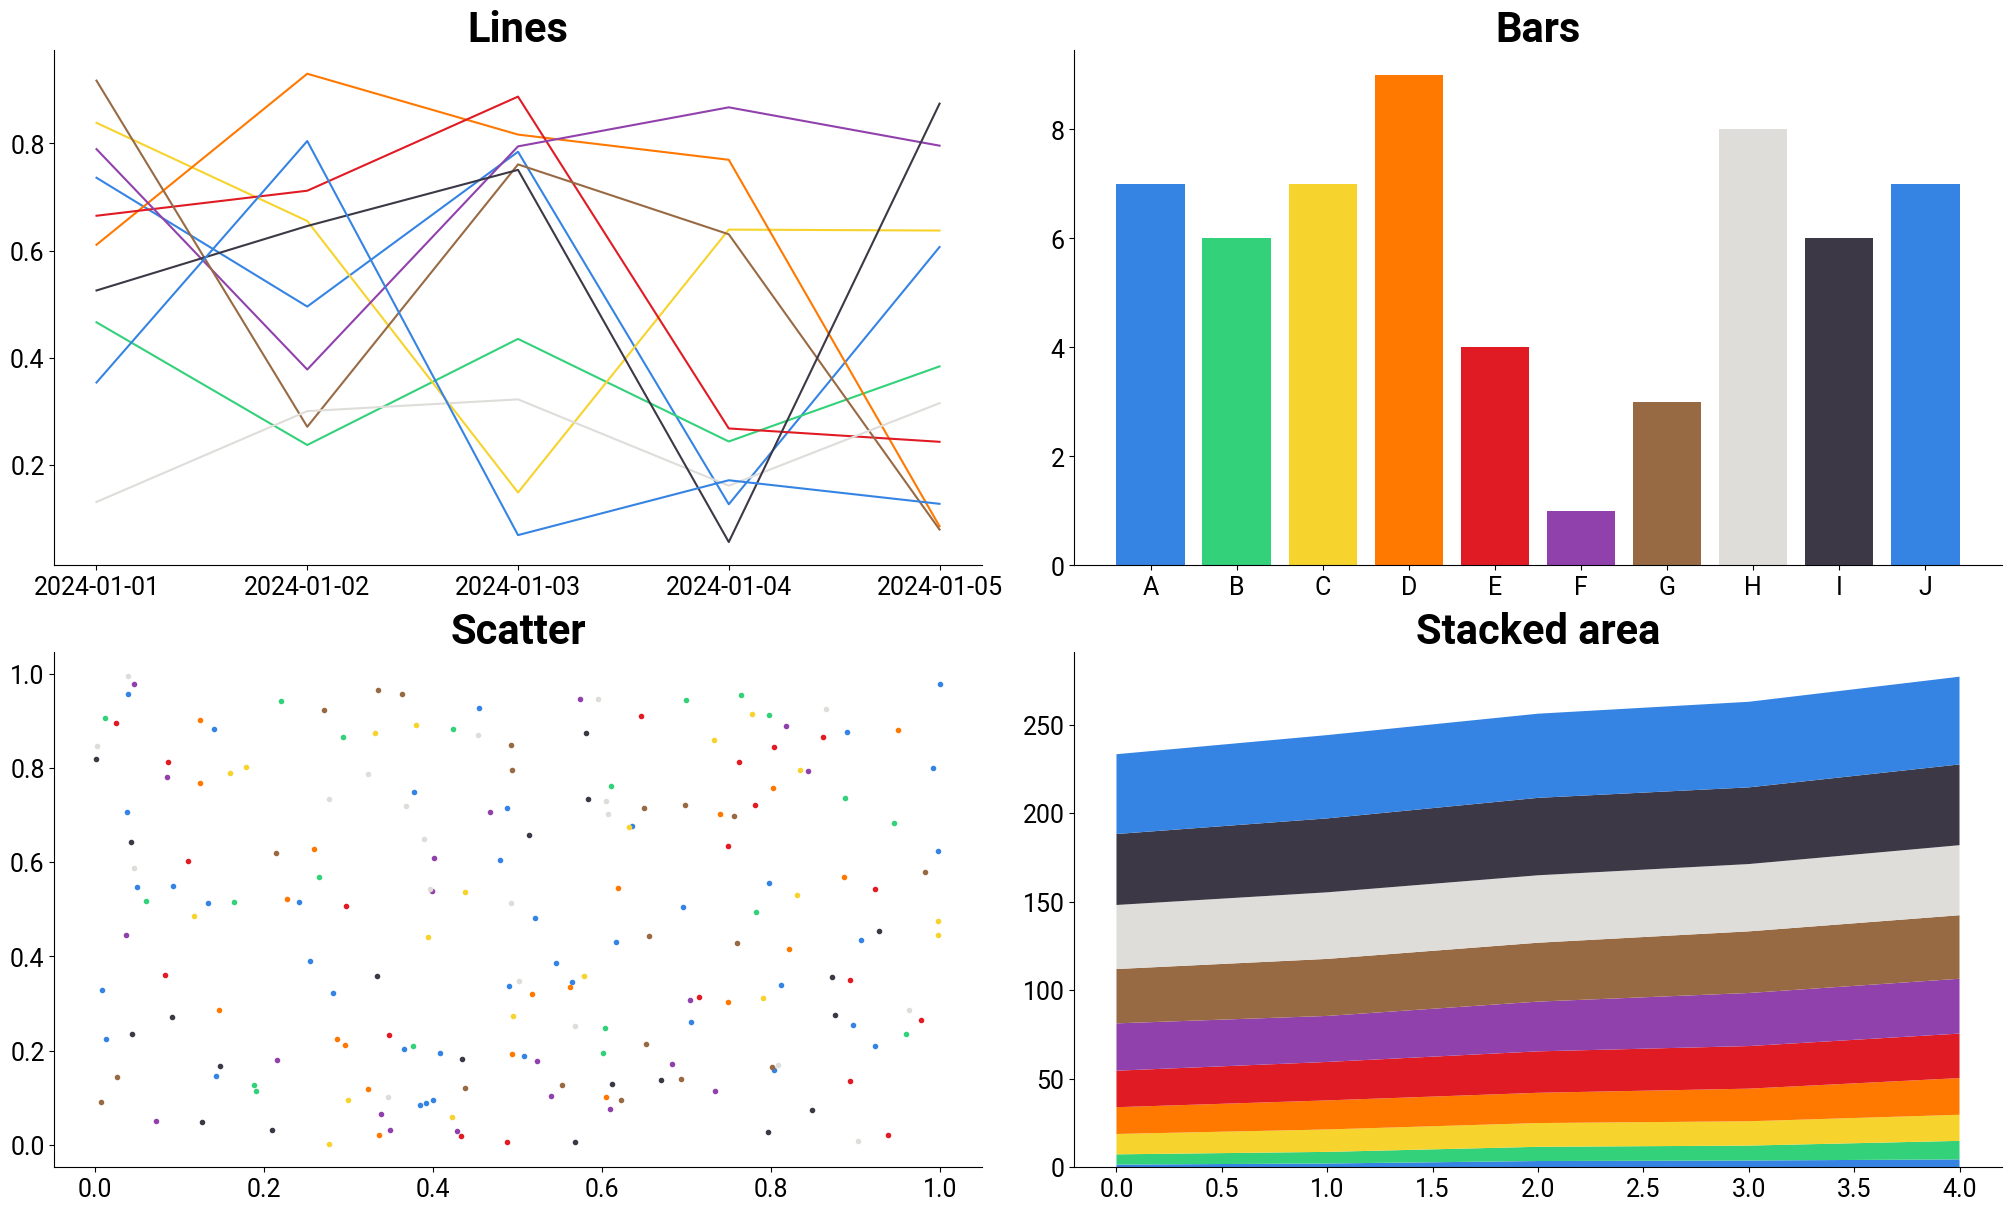

In [17]:
my_plot()